In [1]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 

from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

In [2]:
X = pd.read_csv('./new_features_3_sec.csv')
y = X['label']
X.drop(['filename','label'], axis=1, inplace=True)
print(X.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

(9981, 48)


In [3]:
models = dict()
accuracies = np.array([])

In [4]:
models['Gradient Boosting Classifier'] = GradientBoostingClassifier(random_state=0)
models['Random Forest Classifier'] = RandomForestClassifier(random_state=0)


In [5]:
for model in models:
    models[model].fit(X_train, y_train)
    y_pred = models[model].predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    p_acc = accuracy*100
    accuracies = np.append(accuracies, p_acc)
    print("Accuracy for Model \"" + str(model) + "\": " + str(accuracy))

#Aquired from FCN.ipynb
model_names = np.array(['Gradient Boost', 'Random Forest', 'FCN'])
accuracies = np.append(accuracies, 86.42284569138276)

Accuracy for Model "Gradient Boosting Classifier": 0.7551326990485728
Accuracy for Model "Random Forest Classifier": 0.8047070605908864


In [8]:
print(accuracies)

[75.5132699  80.47070606 86.42284569]


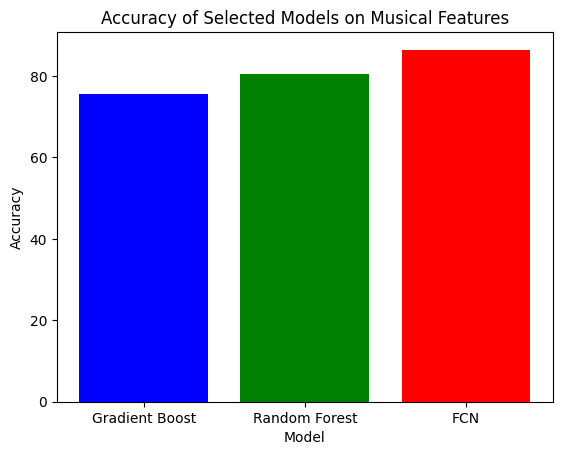

In [9]:
import matplotlib.pyplot as plt

plt.bar(model_names, accuracies, color=['blue', 'green', 'red'])

plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy of Selected Models on Musical Features')

plt.show()
